In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("../Data/our_data.csv")
df.head(10)

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Kansas City,1996-08-16,"Crime,Drama,Music",116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,19000000,1353824,1353824
1,Sommersby,1993-02-05,"Drama,Mystery,Romance",114.0,Jon Amiel,"director,producer,script_department",1948,alive,6.2,22262.0,4.434679,30000000,50081992,140081992
2,We Bought a Zoo,2011-12-23,"Comedy,Drama,Family",124.0,Cameron Crowe,"writer,producer,director",1957,alive,7.1,145614.0,6.078636,50000000,75624550,118729073
3,The Spy Who Loved Me,1977-07-13,"Action,Adventure,Thriller",125.0,Lewis Gilbert,"director,writer,producer",1920,2018,7.0,110757.0,5.850243,14000000,46800000,185400000
4,Next Friday,2000-01-12,Comedy,98.0,Steve Carr,"director,producer",\N,alive,6.1,41748.0,4.643223,9500000,57176582,59675307
5,Melancholia,2011-11-11,"Drama,Sci-Fi",135.0,Lars von Trier,"writer,director,producer",1956,alive,7.1,185676.0,6.205598,9400000,3030848,21817298
6,The Kite Runner,2007-12-14,Drama,128.0,Marc Forster,"producer,director,writer",1969,alive,7.6,80886.0,6.187246,20000000,15800078,74180745
7,Noah,2014-03-27,"Action,Adventure,Drama",138.0,Darren Aronofsky,"producer,writer,director",1969,alive,5.8,257429.0,5.184656,130000000,101200044,352831065
8,Overboard,2018-05-04,"Comedy,Romance",112.0,Rob Greenberg,"producer,director,writer",\N,alive,6.0,39291.0,4.538167,12000000,50316123,91244913
9,The Girl Next Door,2004-04-09,"Comedy,Drama,Romance",109.0,Luke Greenfield,"director,producer,writer",1972,alive,6.7,227685.0,5.949102,25000000,14589444,31635150


In [4]:
df.shape

(3504, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           3504 non-null   object 
 1   production_date       3504 non-null   object 
 2   genres                3504 non-null   object 
 3   runtime_minutes       3504 non-null   float64
 4   director_name         3504 non-null   object 
 5   director_professions  3504 non-null   object 
 6   director_birthYear    3504 non-null   object 
 7   director_deathYear    3504 non-null   object 
 8   movie_averageRating   3504 non-null   float64
 9   movie_numerOfVotes    3504 non-null   float64
 10  approval_Index        3504 non-null   float64
 11  Production budget $   3504 non-null   int64  
 12  Domestic gross $      3504 non-null   int64  
 13  Worldwide gross $     3504 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 383.4+ KB


In [6]:
df.isna().sum()

movie_title             0
production_date         0
genres                  0
runtime_minutes         0
director_name           0
director_professions    0
director_birthYear      0
director_deathYear      0
movie_averageRating     0
movie_numerOfVotes      0
approval_Index          0
Production budget $     0
Domestic gross $        0
Worldwide gross $       0
dtype: int64

In [7]:
df.describe()

,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
count,3504.000000,3504.000000,3.504000e+03,3504.000000,3.504000e+03,3.504000e+03,3.504000e+03
mean,109.824201,6.399287,1.347127e+05,5.015783,3.822253e+07,5.136379e+07,1.117665e+08
std,20.609065,1.025964,2.186926e+05,1.384769,4.556958e+07,7.395503e+07,1.976390e+08
min,63.000000,1.500000,5.000000e+00,0.395487,5.000000e+04,2.640000e+02,4.230000e+02
25%,95.000000,5.800000,2.094525e+04,4.184258,1.000000e+07,8.533081e+06,1.289494e+07
50%,106.000000,6.500000,6.355600e+04,5.022137,2.300000e+07,2.774971e+07,4.315913e+07
75%,120.000000,7.100000,1.556510e+05,5.918673,5.000000e+07,6.261151e+07,1.252223e+08
max,260.000000,9.300000,2.695887e+06,10.000000,4.600000e+08,8.583730e+08,2.923706e+09


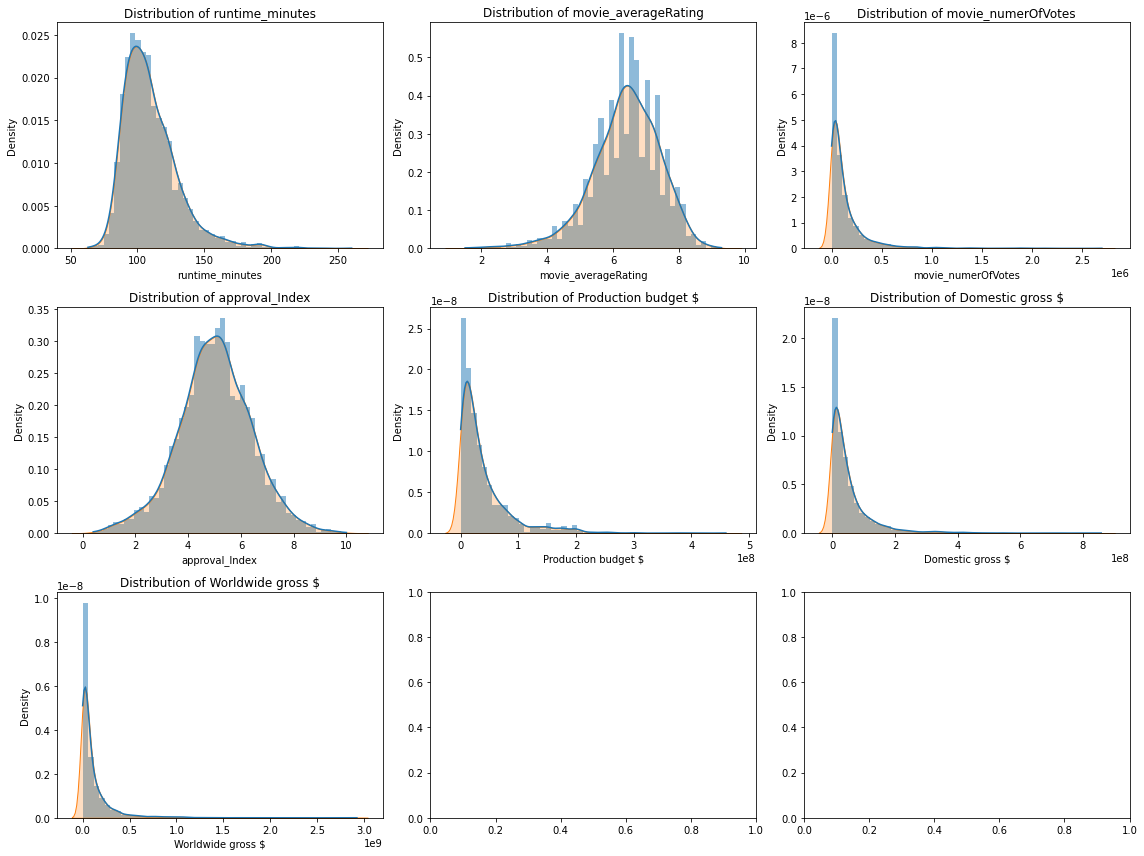

In [8]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axs[i], kde=True, stat="density", linewidth=0, bins=50)
    sns.kdeplot(df[col], ax=axs[i], fill=True)

    axs[i].set_title(f"Distribution of {col}")

fig.tight_layout()
plt.show()

In [9]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

movie_title: 3413 unique values
production_date: 2143 unique values
genres: 312 unique values
runtime_minutes: 130 unique values
director_name: 1617 unique values
director_professions: 293 unique values
director_birthYear: 101 unique values
director_deathYear: 59 unique values
movie_averageRating: 73 unique values
movie_numerOfVotes: 3460 unique values
approval_Index: 3504 unique values
Production budget $: 359 unique values
Domestic gross $: 3421 unique values
Worldwide gross $: 3429 unique values


In [10]:
for col in df.columns:
    print(df[col].value_counts())
    print("---------------------------------------------------")

Brothers                 3
Halloween                3
Hercules                 3
The Visit                3
Weekend                  3
                        ..
The Brothers McMullen    1
The Lost City            1
Catch That Kid           1
The Devil Inside         1
A Civil Action           1
Name: movie_title, Length: 3413, dtype: int64
---------------------------------------------------
2000-12-22    8
2008-10-24    8
2005-09-23    7
2005-09-16    7
2015-11-12    6
             ..
2013-06-21    1
2000-12-27    1
2003-10-22    1
2018-10-12    1
1995-12-29    1
Name: production_date, Length: 2143, dtype: int64
---------------------------------------------------
Comedy,Drama,Romance          157
Adventure,Animation,Comedy    129
Drama                         127
Comedy                        125
Comedy,Drama                  123
                             ... 
Documentary,Drama,Family        1
Action,Fantasy,Thriller         1
Animation,Family,History        1
Drama,Family,Western 

Text(0.5, 1.0, 'Correlation Matrix\nDeterminant: 0.0036645983103785677')

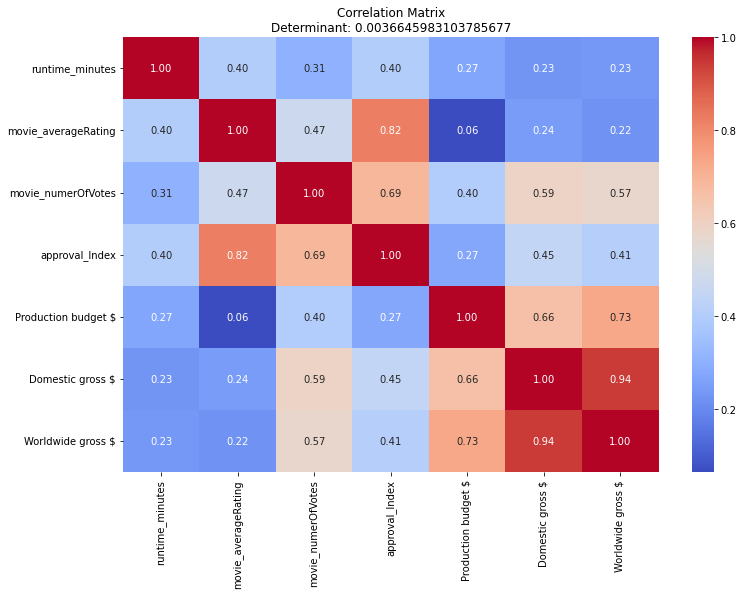

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
determinant = np.linalg.det(df.corr())
plt.title(f"Correlation Matrix\nDeterminant: {determinant}")

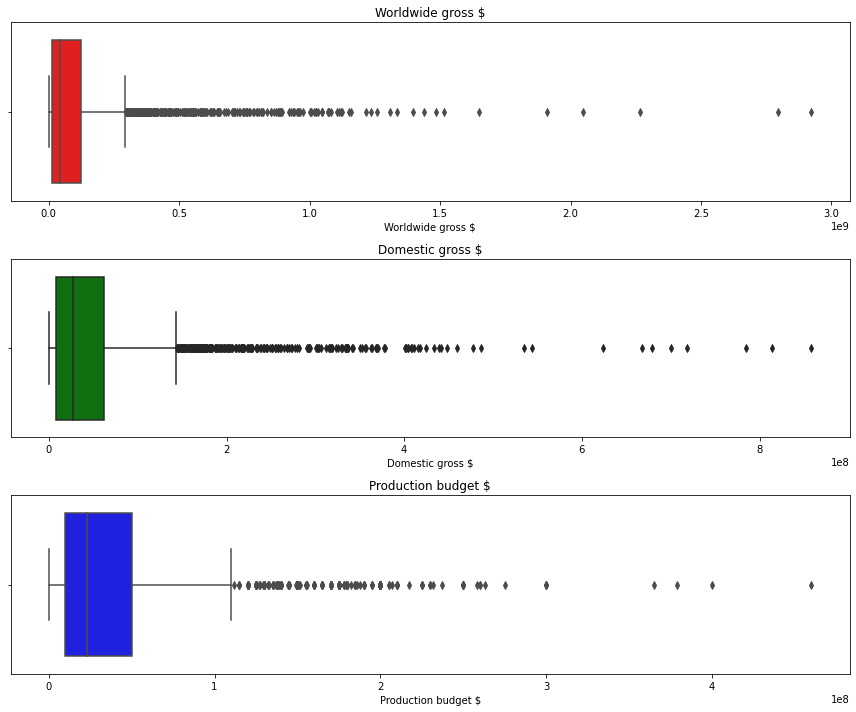

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10))
axs = axs.flatten()

sns.boxplot(df["Worldwide gross $"], ax=axs[0], orient='v', color='red')
axs[0].set_title("Worldwide gross $")

sns.boxplot(df["Domestic gross $"], ax=axs[1], orient='v', color='green')
axs[1].set_title("Domestic gross $")

sns.boxplot(df["Production budget $"], ax=axs[2], orient='v', color='blue')
axs[2].set_title("Production budget $")

fig.tight_layout()
plt.show()

In [13]:
df = df.drop('genres', axis=1).join(df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
df.head()

,movie_title,production_date,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,genres
0,Kansas City,1996-08-16,116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,19000000,1353824,1353824,Crime
0,Kansas City,1996-08-16,116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,19000000,1353824,1353824,Drama
0,Kansas City,1996-08-16,116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,19000000,1353824,1353824,Music
1,Sommersby,1993-02-05,114.0,Jon Amiel,"director,producer,script_department",1948,alive,6.2,22262.0,4.434679,30000000,50081992,140081992,Drama
1,Sommersby,1993-02-05,114.0,Jon Amiel,"director,producer,script_department",1948,alive,6.2,22262.0,4.434679,30000000,50081992,140081992,Mystery


In [14]:
genre_financial_data = df.groupby('genres').agg({
    'Domestic gross $': 'mean',
    'Worldwide gross $': 'mean'
}).reset_index()

In [17]:
genre_financial_data.head()

,genres,Domestic gross $,Worldwide gross $
0,Action,7.622485e+07,1.864010e+08
1,Adventure,9.846118e+07,2.508115e+08
2,Animation,1.203696e+08,3.062022e+08
3,Biography,3.406918e+07,6.368809e+07
4,Comedy,5.172929e+07,1.030124e+08


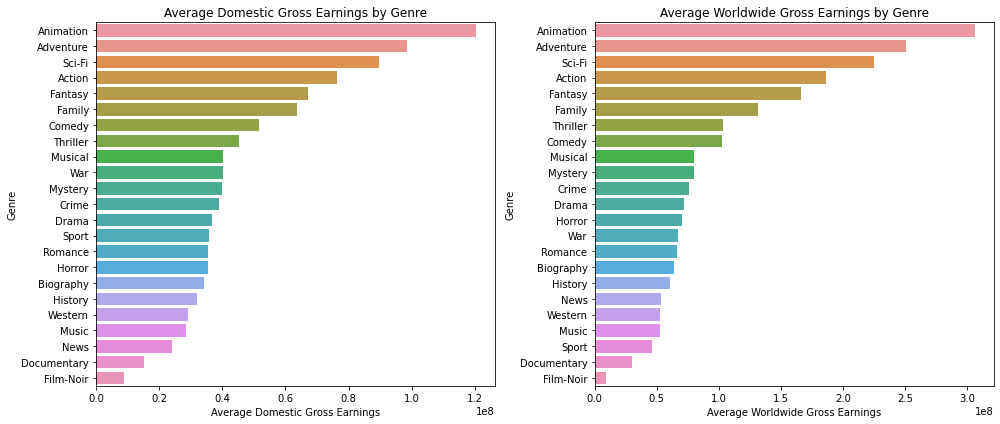

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Domestic gross $', y='genres', ax=axs[0] ,data=genre_financial_data.sort_values('Domestic gross $', ascending=False))
axs[0].set_title('Average Domestic Gross Earnings by Genre')
axs[0].set_xlabel('Average Domestic Gross Earnings')
axs[0].set_ylabel('Genre')

sns.barplot(x='Worldwide gross $', y='genres', ax=axs[1],data=genre_financial_data.sort_values('Worldwide gross $', ascending=False))
axs[1].set_title('Average Worldwide Gross Earnings by Genre')
axs[1].set_xlabel('Average Worldwide Gross Earnings')
axs[1].set_ylabel('Genre')

plt.tight_layout()
plt.show()

In [30]:
director_data = df.groupby('director_name').agg({
    'movie_averageRating': 'mean',
    'Domestic gross $': 'mean',
    'Worldwide gross $': 'mean'
}).reset_index()

In [31]:
director_data.head()

,director_name,movie_averageRating,Domestic gross $,Worldwide gross $
0,-,6.525392,9.071314e+07,2.221546e+08
1,Aaron Woodley,4.800000,5.801249e+06,1.128515e+07
2,Abderrahmane Sissako,7.100000,1.076075e+06,6.815821e+06
3,Abel Ferrara,6.600000,1.212799e+06,1.412799e+06
4,Adam Marcus,4.100000,1.593507e+07,1.593507e+07


In [35]:
top_directors_rating = director_data.sort_values('movie_averageRating', ascending=False).head(15)
top_directors_rating

,director_name,movie_averageRating,Domestic gross $,Worldwide gross $
1431,Steve Kopera,9.000000,6.260000e+03,6.260000e+03
1494,Tim Martin Crouse,8.700000,3.668600e+04,1.359347e+07
1537,Tony Kaye,8.500000,6.719864e+06,6.719864e+06
193,Charles Chaplin,8.500000,1.632450e+05,2.295490e+05
1604,Yann Arthus-Bertrand,8.500000,1.543300e+04,4.479317e+07
278,Dana Kjeldsen,8.500000,1.535146e+07,6.185044e+07
895,Lee Unkrich,8.300000,4.150049e+08,1.068880e+09
1371,Sergio Leone,8.300000,5.321508e+06,5.576072e+06
1113,Nitesh Tiwari,8.300000,1.239176e+07,3.051495e+08
724,John Lasseter,8.300000,1.925232e+08,3.652710e+08


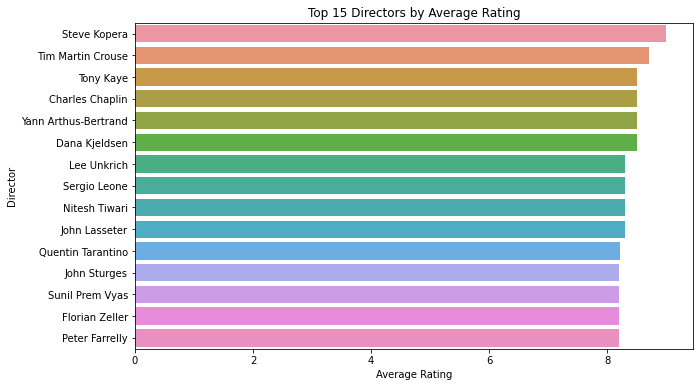

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x='movie_averageRating', y='director_name', data=top_directors_rating)
plt.title('Top 15 Directors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()

In [12]:
from sklearn.calibration import LabelEncoder

categoriacal = df.select_dtypes(include=[np.object]).columns

df_copy = df.copy()

le = LabelEncoder()
for i in categoriacal:
    df_copy[i] = le.fit_transform(df_copy[i])

In [13]:
df_copy.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,1372,532,207,116.0,1279,141,33,41,6.3,5077.0,3.823171,19000000,1353824,1353824
1,2260,403,268,114.0,753,137,56,58,6.2,22262.0,4.434679,30000000,50081992,140081992
2,3296,1415,155,124.0,180,284,65,58,7.1,145614.0,6.078636,50000000,75624550,118729073
3,3021,144,14,125.0,903,162,28,53,7.0,110757.0,5.850243,14000000,46800000,185400000
4,1759,702,143,98.0,1427,123,100,58,6.1,41748.0,4.643223,9500000,57176582,59675307


Text(0.5, 1.0, 'Correlation Matrix\nDeterminant: 0.0036645983103785677')

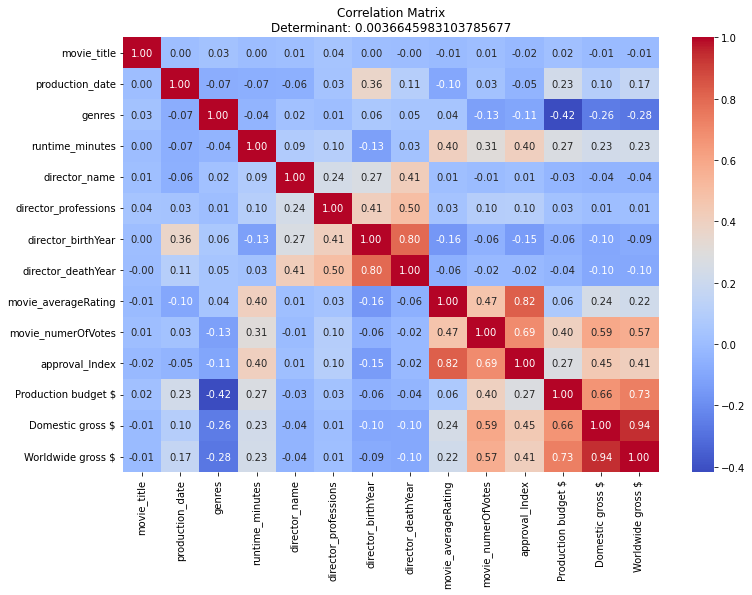

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_copy.corr(), annot=True, cmap="coolwarm", fmt=".2f")
determinant = np.linalg.det(df.corr())
plt.title(f"Correlation Matrix\nDeterminant: {determinant}")